In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [4]:

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of training samples: 8982
Number of test samples: 2246


In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)


In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [7]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(10000,)),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')  # 46 categories => softmax
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.3691 - loss: 3.5596 - val_accuracy: 0.5381 - val_loss: 2.5272
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5868 - loss: 2.1562 - val_accuracy: 0.6806 - val_loss: 1.6353
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6935 - loss: 1.4532 - val_accuracy: 0.7162 - val_loss: 1.3408
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7622 - loss: 1.0891 - val_accuracy: 0.7451 - val_loss: 1.1836
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8115 - loss: 0.8711 - val_accuracy: 0.7624 - val_loss: 1.1018
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8598 - loss: 0.6962 - val_accuracy: 0.7746 - val_loss: 1.0395
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8889 - loss: 0.5458 - val_accuracy: 0.7802 - val_loss: 0.9995
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9090 - loss: 0.4733 - val_accuracy: 0.7947 - v

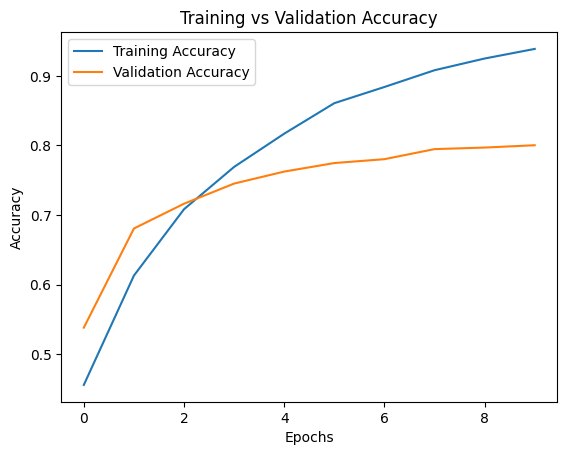

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7933 - loss: 0.9449

Test Accuracy: 0.7863


In [12]:
predictions = model.predict(X_test)
predicted_class = np.argmax(predictions[0])
print(f"Predicted class for first test sample: {predicted_class}")


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted class for first test sample: 3


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [14]:
# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to predicted class index
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot labels back to class index
y_true = np.argmax(y_test, axis=1)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [15]:
# Count frequency of each true label
(unique, counts) = np.unique(y_true, return_counts=True)
sorted_indices = np.argsort(-counts)  # descending order
top_classes = unique[sorted_indices[:10]]

# Filter predictions and labels to only top 10 classes
mask = np.isin(y_true, top_classes)
y_true_top10 = y_true[mask]
y_pred_top10 = y_pred[mask]


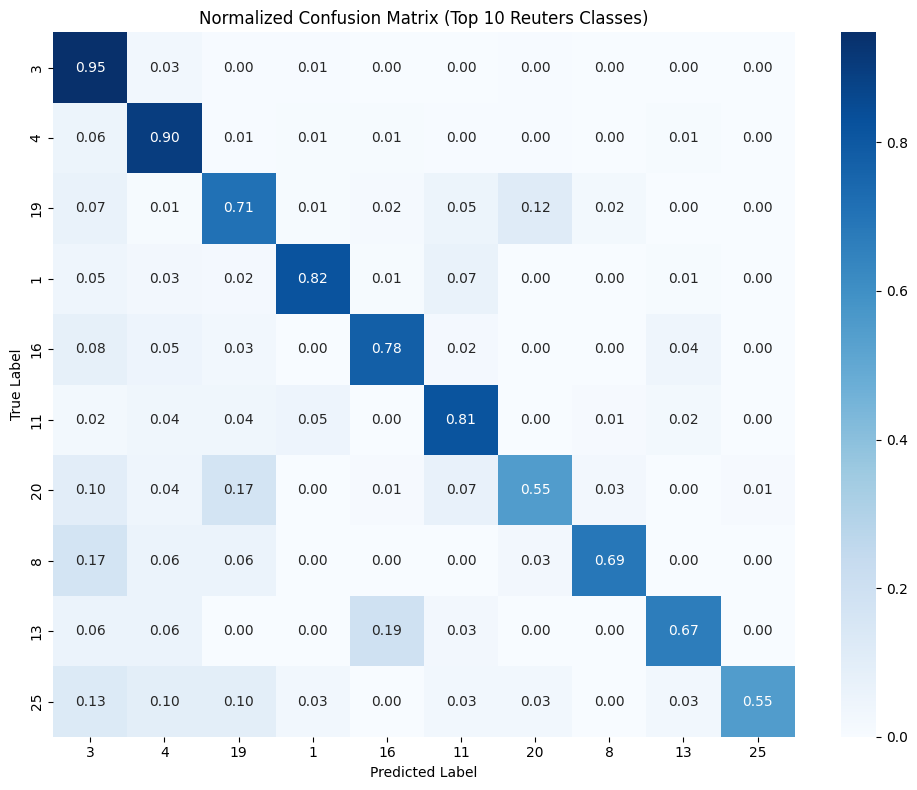

In [16]:
# Build confusion matrix
cm_top10 = confusion_matrix(y_true_top10, y_pred_top10, labels=top_classes)

# Normalize (row-wise)
cm_top10_normalized = cm_top10.astype('float') / cm_top10.sum(axis=1)[:, np.newaxis]

# Plot with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_top10_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=top_classes, yticklabels=top_classes)
plt.title("Normalized Confusion Matrix (Top 10 Reuters Classes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [17]:
model.save("reuters_news_model.h5")


In [18]:
from tensorflow.keras.models import load_model
model = load_model("reuters_news_model.h5")


In [19]:
# Get the mapping from word -> index
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
def encode_new_text(text, word_index, max_words=10000):
    # Basic preprocessing: lowercase and split
    tokens = text.lower().split()
    # Convert to word indices (0 for unknown)
    encoded = [word_index.get(word, 0) for word in tokens]
    # Create binary bag-of-words vector
    vectorized = np.zeros((1, max_words))
    for index in encoded:
        if index < max_words:
            vectorized[0, index] = 1
    return vectorized


In [21]:
new_text = "The stock market saw a major shift as tech companies surged in the second quarter"
x_input = encode_new_text(new_text, word_index)

prediction = model.predict(x_input)
predicted_class = np.argmax(prediction[0])

print(f"Predicted topic class: {predicted_class} (Confidence: {np.max(prediction[0]):.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted topic class: 4 (Confidence: 0.0780)


In [22]:
from tensorflow.keras.datasets import reuters
_, train_labels = reuters.load_data(num_words=10000)[0]
num_classes = np.max(train_labels) + 1
print("Number of classes:", num_classes)


Number of classes: 46
